# Paket Prabayar Manakah yang Lebih Baik?

Anda bekerja sebagai seorang analis di perusahaan operator telekomunikasi bernama Megaline. Perusahaan tersebut menawarkan kliennya dua jenis paket prabayar, yaitu paket Surf dan paket Ultimate. Departemen periklanan ingin mengetahui paket prabayar mana yang menghasilkan lebih banyak pendapatan, sehingga mereka bisa membuat anggaran iklan yang sesuai.

Anda akan melakukan analisis awal untuk paket-paket prabayar tersebut berdasarkan sampel klien yang berukuran relatif kecil. Anda memiliki 500 data klien Megaline, yang berisi informasi seperti: siapa mereka, dari mana asalnya, jenis paket apa yang mereka gunakan, serta jumlah panggilan dan pesan yang mereka kirim di tahun 2018. Tugas Anda adalah untuk menganalisis perilaku para pengguna, lalu menentukan paket prabayar manakah yang lebih menguntungkan.

[Kami telah memberikan Anda beberapa komentar yang bisa Anda jadikan panduan untuk menyelesaikan proyek ini. Akan tetapi, pastikan untuk menghapus semua komentar yang berada di dalam tanda kurung sebelum mengirimkan proyek Anda.]

[Sebelum Anda menganalisis data lebih jauh, jelaskan tujuan dari proyek ini dan langkah apa saja yang akan Anda lakukan.]

[Perlu diingat bahwa mempelajari, mengubah, dan menganalisis data merupakan proses yang dilakukan secara berulang-ulang. Memeriksa kembali langkah sebelumnya agar kesalahan yang Anda buat tidak akan memengaruhi langkah berikutnya adalah hal yang lumrah dilakukan.]

## Inisialisasi

In [120]:
# Muat semua library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

## Memuat Data

In [121]:
# Muat file data ke dalam DataFrame yang berbeda
df_calls = pd.read_csv('/datasets/megaline_calls.csv')
df_internet = pd.read_csv('/datasets/megaline_internet.csv')
df_messages = pd.read_csv('/datasets/megaline_messages.csv')
df_plans = pd.read_csv('/datasets/megaline_plans.csv')
df_users = pd.read_csv('/datasets/megaline_users.csv')

## Mempersiapkan Data

[Data untuk proyek ini dibagi menjadi beberapa tabel. Jelajahi masing-masing tabel untuk mendapatkan pemahaman awal tentang data Anda. Lakukan koreksi di setiap tabel jika memang diperlukan.]

`Mengecek Data User`

In [122]:
df_users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


### Deskripsi data user
- `user_id` merupakan id pengguna
- `plan` merupakan jenis paket berlangganan
- `reg_date` merupakan tanggal mulai berlangganan (yy-mm-dd)
- `churn_date` tanggal pengguna berhenti menggunakan layanan
- `age` umur pengguna dalam tahun
- `city` kota tempat pengguna tinggal
- `first_name` nama awal pengguna
- `last_name` nama akhir pengguna

Mengecek info data df_users

In [123]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [124]:
df_users.isna().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

In [125]:
df_users.duplicated().sum()

0

Kesimpulan Sementara:
- Kolom `reg_date` bertipe object bukan datetime, seharusnya kolom `reg_date` bertipe datetime
- pada kolom `churn_date` terdapat 466 nilai yang hilang yang berarti sebanyak 466 orang masih berlangganan
- data pada df_users tidak memiliki nilai yang terduplikat

`Mengecek Data Calls`

In [126]:
df_calls

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


### Deskripsi data calls :
- kolom `id` merupakan id panggilan
- kolom `user_id` merupakan id pengguna
- kolom `call_date` merupakan tanggal panggilan
- kolom `duration` merupakan durasi panggilan dalam menit
- terdapat anomali pada kolom `duration` karena nilai minimum durasi panggilan adalah 0 menit

In [127]:
df_calls.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [128]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


Kesimpulan Sementara
- kolom `call_date` seharusnya memiliki format datetime
- kolom `duration` seharusnya dibulatkan keatas dan memiliki format integer

### Deskripsi data messages
- kolom `id` memuat id message
- kolom `user_id` memuat id pengguna
- kolom `message_date` memuat tanggal pesan dalam format 'yy-mm-dd'

In [129]:
df_messages

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


In [130]:
df_messages.isna().sum()

id              0
user_id         0
message_date    0
dtype: int64

In [131]:
df_messages.duplicated().sum()

0

In [132]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


Kesimpulan Sementara
- kolom `message_date` seharusnya memiliki format datetime
- kolom pada df_messages tidak memiliki duplikat
- kolom pada df_messages tidak memiliki nilai yang hilang

### Deskripsi data Internet
- kolom `id` memuat id internet
- kolom `user_id` memuat id pengguna
- kolom `session_date` memuat tanggal penggunaan paket internet
- kolom `mb_used` memuat jumlah megabita data paket internet yang telah digunakan


In [133]:
df_internet

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


In [134]:
df_internet.describe()

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [135]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [136]:
df_internet.isna().sum()

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

In [137]:
df_internet.duplicated().sum()

0

Kesimpulan sementara
- pada `df_internet` tidak ada nilai yang hilang dan tidak data yang terduplikasi
- pada kolom `session_date` seharusnya memiliki tipe data datetime
- pada kolom `mb_used` akan dilakukan pembulatan keatas dan pengubahan tipe data menjadi integer
- pada kolom `mb_used` akan dikonversi ke satuan gigabyte

### Deskripsi data plan paket internet
- kolom `message_included` menunjukan jumlah sms gratis yang termasuk kedalam paket surf ataupun ultimate
- kolom `mb_per_month_included` menunjukan kapasitas megabita yang termasuk kedalam paket surf ataupun ultimate
- kolom `minutes_included` menunjukan jumlah durasi telfon yang diberikan yang termasuk kedalam paket surf ataupun ultimate
- kolom `usd_monthly_pay` merupakan biaya berlangganan bulanan untuk paket surf ataupun ultimate
- kolom `usd_per_gb` merupakan biaya yang diperlukan untuk setiap gigabita pada paket surf ataupun ultimate
- kolom `usd_per_message` merupakan biaya yang dikeluarkan tiap melakukan pesan sms untuk paket surf ataupun ultimate
- kolom `usd_per_minute` merupakan biaya yang dikeluarkan untuk melakukan panggilan per menit nya untuk paket surf ataupun ultimate

In [138]:
df_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Paket Prabayar

In [139]:
# Tampilkan informasi/rangkuman umum tentang DataFrame paket-paket prabayar



- `user_id` merupakan id pengguna
- `plan` merupakan jenis paket berlangganan
- `reg_date` merupakan tanggal mulai berlangganan (yy-mm-dd)
- `churn_date` tanggal pengguna berhenti menggunakan layanan
- `age` umur pengguna dalam tahun
- `city` kota tempat pengguna tinggal
- `first_name` nama awal pengguna
- `last_name` nama akhir pengguna
- kolom `id` merupakan id panggilan
- kolom `user_id` merupakan id pengguna
- kolom `call_date` merupakan tanggal panggilan
- kolom `duration` merupakan durasi panggilan dalam menit
- terdapat anomali pada kolom duration karena nilai minimum durasi panggilan adalah 0 menit
- kolom `id` memuat id message
- kolom `user_id` memuat id pengguna
- kolom `message_date` memuat tanggal pesan dalam format 'yy-mm-dd'
- kolom `id` memuat id internet
- kolom `user_id` memuat id pengguna
- kolom `session_date` memuat tanggal penggunaan paket internet
- kolom `mb_used` memuat jumlah megabita data paket internet yang telah digunakan
- kolom `message_included` menunjukan jumlah sms gratis yang termasuk kedalam paket surf ataupun ultimate
- kolom `mb_per_month_included` menunjukan kapasitas megabita yang termasuk kedalam paket surf ataupun ultimate
- kolom `minutes_included` menunjukan jumlah durasi telfon yang diberikan yang termasuk kedalam paket surf ataupun ultimate
- kolom `usd_monthly_pay` merupakan biaya berlangganan bulanan untuk paket surf ataupun ultimate
- kolom `usd_per_gb` merupakan biaya yang diperlukan untuk setiap gigabita pada paket surf ataupun ultimate
- kolom `usd_per_message` merupakan biaya yang dikeluarkan tiap melakukan pesan sms untuk paket surf ataupun ultimate
- kolom `usd_per_minute` merupakan biaya yang dikeluarkan untuk melakukan panggilan per menit nya untuk paket surf ataupun ultimate


In [140]:
# Tampilkan sampel data untuk paket-paket tersebut



In [141]:
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


[Deskripsikan apa yang Anda lihat dan perhatikan dalam informasi umum dan sampel data yang ditampilkan terkait harga. Apakah terdapat masalah (seperti: tipe data yang tidak sesuai, data yang hilang, dll.) yang mungkin memerlukan penyelidikan dan perubahan lebih lanjut? Bagaimana memperbaiki masalah tersebut?]

## Memperbaiki Data

[Perbaiki masalah data yang eksplisit berdasarkan pengamatan awal.]

Tidak ada yang perlu diperbaiki pada `df_plans` semua data sudah bersih dan baik untuk digunakan, tapi akan lebih baik jika 
kolom mb_per_month_included kita konversi ke satuan gigabyte, karena biaya tarif paket internet dihitung per gigabyte, oleh 
karena itu kita akan menambahkan kolom `gb_per_month_included` pada `df_plans`

In [142]:
df_plans['gb_per_month_included'] = df_plans['mb_per_month_included']/1024

In [143]:
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0



## Memperkaya Kualitas Data

[Tambahkan faktor pendukung pada data jika Anda yakin bahwa faktor tersebut memang berguna.]

## Pengguna

In [144]:
# Tampilkan informasi/rangkuman umum tentang DataFrame pengguna
df_users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [145]:
# Tampilkan sampel data pengguna
df_users.head()


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


[Deskripsikan apa yang Anda lihat dan perhatikan dalam informasi umum dan sampel data yang ditampilkan terkait harga. Apakah terdapat masalah (seperti: tipe data yang tidak sesuai, data yang hilang, dll.) yang mungkin memerlukan penyelidikan dan perubahan lebih lanjut? Bagaimana memperbaiki masalah tersebut?]

### Memperbaiki Data

[Perbaiki masalah data yang eksplisit berdasarkan pengamatan awal.]

Terdapat beberapa permasalahan pada dataframe `df_users`, diantaranya adalah:
- Tipe data reg_date seharusnya datetime
- pada kolom `churn_date` yang bernilai NaN seharusnya masih berlangganan sehingga harus diisi dengan 'Subscribing'

In [146]:
df_users['churn_date'] = df_users['churn_date'].fillna('subscribing')

In [147]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format = '%Y-%m-%d')

In [148]:
df_users.dtypes

user_id                int64
first_name            object
last_name             object
age                    int64
city                  object
reg_date      datetime64[ns]
plan                  object
churn_date            object
dtype: object

### Memperkaya Kualitas Data

[Tambahkan faktor pendukung pada data jika Anda yakin bahwa faktor tersebut memang berguna.]

## Panggilan

In [149]:
# Tampilkan informasi/rangkuman umum tentang DataFrame panggilan
df_calls.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [150]:
# Tampilkan sampel data berisi panggilan
df_calls.head()


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


[Deskripsikan apa yang Anda lihat dan perhatikan dalam informasi umum dan sampel data yang ditampilkan terkait harga. Apakah terdapat masalah (seperti: tipe data yang tidak sesuai, data yang hilang, dll.) yang mungkin memerlukan penyelidikan dan perubahan lebih lanjut? Bagaimana memperbaiki masalah tersebut?]

Terdapat beberapa permasalahan pada `df_calls`, diantaranya adalah:
    
    - kolom `call_date` seharusnya memiliki tipe data datetime
    - kolom duration seharusnya memiliki tipe data integer

### Memperbaiki Data

[Perbaiki masalah data yang eksplisit berdasarkan pengamatan awal.]

In [151]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format = '%Y-%m-%d')

In [152]:
df_calls.dtypes

id                   object
user_id               int64
call_date    datetime64[ns]
duration            float64
dtype: object

In [153]:
df_calls['duration'] = np.ceil(df_calls['duration']).astype(int)

In [154]:
df_calls.dtypes

id                   object
user_id               int64
call_date    datetime64[ns]
duration              int64
dtype: object

In [155]:
df_calls

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9
1,1000_145,1000,2018-12-27,14
2,1000_247,1000,2018-12-27,15
3,1000_309,1000,2018-12-28,6
4,1000_380,1000,2018-12-30,5
...,...,...,...,...
137730,1499_199,1499,2018-11-21,9
137731,1499_200,1499,2018-10-20,11
137732,1499_201,1499,2018-09-21,9
137733,1499_202,1499,2018-10-10,1


In [156]:
df_calls['duration'].unique()

array([ 9, 14, 15,  6,  5,  3, 13,  2,  4, 10, 11,  1, 16,  0,  7,  8, 30,
       12, 19, 17, 22, 27, 21, 20, 18, 26, 23, 24, 25, 28, 33, 32, 29, 31,
       36, 38, 34, 37])

### Memperkaya Kualitas Data

[Tambahkan faktor pendukung pada data jika Anda yakin bahwa faktor tersebut memang berguna.]

## Pesan/SMS

In [157]:
# Tampilkan informasi/rangkuman umum tentang DataFrame SMS
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [158]:
df_messages.isna().sum()

id              0
user_id         0
message_date    0
dtype: int64

In [159]:
# Tampilkan sampel data untuk SMS
df_messages.head()


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


[Deskripsikan apa yang Anda lihat dan perhatikan dalam informasi umum dan sampel data yang ditampilkan terkait harga. Apakah terdapat masalah (seperti: tipe data yang tidak sesuai, data yang hilang, dll.) yang mungkin memerlukan penyelidikan dan perubahan lebih lanjut? Bagaimana memperbaiki masalah tersebut?]

### Memperbaiki Data

[Perbaiki masalah data yang eksplisit berdasarkan pengamatan awal.]

Pada kasus ini kita akan mengubah tipe data kolom `message_date` dari object menjadi datetime

In [160]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format = '%Y-%m-%d')

In [161]:
df_messages.dtypes

id                      object
user_id                  int64
message_date    datetime64[ns]
dtype: object

### Memperkaya Kualitas Data

[Tambahkan faktor pendukung pada data jika Anda yakin bahwa faktor tersebut memang berguna.]

## Internet

In [162]:
# Tampilkan informasi/rangkuman umum tentang DataFrame internet
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [163]:
df_internet.isna().sum()

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

In [164]:
# Tampilkan sampel data untuk traffic internet
df_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


[Deskripsikan apa yang Anda lihat dan perhatikan dalam informasi umum dan sampel data yang ditampilkan terkait harga. Apakah terdapat masalah (seperti: tipe data yang tidak sesuai, data yang hilang, dll.) yang mungkin memerlukan penyelidikan dan perubahan lebih lanjut? Bagaimana memperbaiki masalah tersebut?]

### Memperbaiki Data

[Perbaiki masalah data yang eksplisit berdasarkan pengamatan awal.]

In [165]:
df_internet['gb_used'] = df_internet['mb_used']/1024

In [166]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format = '%Y-%m-%d')

In [167]:
df_internet.head()

,id,user_id,session_date,mb_used,gb_used
0,1000_13,1000,2018-12-29,89.86,0.087754
1,1000_204,1000,2018-12-31,0.00,0.000000
2,1000_379,1000,2018-12-28,660.40,0.644922
3,1000_413,1000,2018-12-26,270.99,0.264639
4,1000_442,1000,2018-12-27,880.22,0.859590


### Memperkaya Kualitas Data

[Tambahkan faktor pendukung pada data jika Anda yakin bahwa faktor tersebut memang berguna.]

Menambahkan Format kolom dalam Bulan pada `df_calls` `df_messages` dan `df_internet`

In [168]:
df_calls['month'] = df_calls['call_date'].dt.month_name()

In [169]:
df_messages['month'] = df_messages['message_date'].dt.month_name()

In [170]:
df_internet['month'] = df_internet['session_date'].dt.month_name()

## Mempelajari Syarat dan Kondisi Terkait Paket Prabayar

[Sangat penting untuk memahami cara kerja paket, bagaimana pengguna dikenakan biaya berdasarkan paket prabayar yang mereka pilih. Oleh karena itu, kami sarankan Anda menampilkan informasi paket guna memeriksa persyaratannya sekali lagi.]

In [171]:
# Tampilkan persyaratan paket prabayar dan pastikan Anda memahaminya


Deskripsi Paket Prabayar Catatan: 
Megaline membulatkan detik ke menit, serta 
membulatkan megabita ke gigabita. Untuk panggilan, setiap panggilan 
individual dibulatkan ke atas: bahkan jika panggilan tersebut berlangsung  
hanya satu detik, ia akan dihitung sebagai satu menit. Untuk lalu lintas web
, setiap sesi web tidak dibulatkan ke atas. Akan tetapi, total untuk sebulan 
dibulatkan ke atas. Jika seorang pengguna menghabiskan 1025 megabita bulan ini, maka 
ia akan dikenai biaya untuk 2 gigabita.

Surf
- Biaya bulanan: 20 dollar
- 500 menit durasi panggilan per bulan, 50 SMS, dan 15 GB data
Setelah melebihi batas paket, akan dikenakan:
- 1 menit: 3 sen
- 1 SMS: 3 sen
- 1 GB data: 10 dollar
    
Ultimate
- Biaya bulanan: 70 dollar
- 3000 menit durasi panggilan per bulan, 1000 SMS, dan 30 GB data
Setelah melebihi batas paket, akan dikenakan:
- 1 menit: 1 sen
- 1 SMS: 1 sen
- 1 GB data: 7 dollar

## Mengagregasi Data per Pengguna

[Sekarang, karena data yang kita miliki telah bersih, agregasikan data setiap pengguna per periode agar kita hanya memiliki satu catatan per pengguna per periode. Hal ini akan memudahkan analisis lebih lanjut.]

In [172]:
# Hitung jumlah panggilan yang dilakukan oleh setiap pengguna per bulan. Simpan hasilnya.
total_calls = df_calls.pivot_table(index =['user_id','month'], values='duration', aggfunc=['count','sum'])
total_calls.columns = ['call_count','total_duration']
total_calls.reset_index()

,user_id,month,call_count,total_duration
0,1000,December,16,124
1,1001,August,27,182
2,1001,December,56,412
3,1001,November,64,426
4,1001,October,65,393
...,...,...,...,...
2253,1498,September,45,363
2254,1499,December,65,496
2255,1499,November,45,308
2256,1499,October,53,385


In [173]:
# Hitung jumlah menit yang dihabiskan oleh setiap pengguna untuk melakukan panggilan per bulan. Simpan hasilnya.
total_calls


call_count  total_duration
user_id month                                
1000    December           16             124
1001    August             27             182
        December           56             412
        November           64             426
        October            65             393
...                       ...             ...
1498    September          45             363
1499    December           65             496
        November           45             308
        October            53             385
        September          41             346

[2258 rows x 2 columns]

In [174]:
# Hitung jumlah SMS yang dikirim oleh setiap pengguna per bulan. Simpan hasilnya.
total_messages = df_messages.pivot_table(index = ['user_id','month'], values= 'message_date', aggfunc=['count'])
total_messages.columns = ['total_sms']
total_messages.reset_index()


,user_id,month,total_sms
0,1000,December,11
1,1001,August,30
2,1001,December,44
3,1001,November,36
4,1001,October,53
...,...,...,...
1801,1496,December,11
1802,1496,November,13
1803,1496,October,18
1804,1496,September,21


In [175]:
# Hitung volume traffic internet yang digunakan oleh setiap pengguna per bulan. Simpan hasilnya.
total_session = df_internet.pivot_table(index=['user_id','month'], values='mb_used', aggfunc =['sum'])
total_session.columns = ['total_mb']
total_session.reset_index()

,user_id,month,total_mb
0,1000,December,1901.47
1,1001,August,6919.15
2,1001,December,19369.18
3,1001,November,18504.30
4,1001,October,22330.49
...,...,...,...
2272,1498,September,22827.28
2273,1499,December,22059.21
2274,1499,November,16813.83
2275,1499,October,19492.43


In [176]:
total_session['gb_used'] = (total_session['total_mb']/1024).apply(np.ceil).astype(int)
total_session.reset_index()

,user_id,month,total_mb,gb_used
0,1000,December,1901.47,2
1,1001,August,6919.15,7
2,1001,December,19369.18,19
3,1001,November,18504.30,19
4,1001,October,22330.49,22
...,...,...,...,...
2272,1498,September,22827.28,23
2273,1499,December,22059.21,22
2274,1499,November,16813.83,17
2275,1499,October,19492.43,20


[Satukan data agregat tersebut ke dalam satu DataFrame sehingga satu catatan di dalamnya akan menunjukkan tingkat konsumsi seorang pengguna unik dalam satu bulan tertentu].

In [177]:
# Gabungkan data panggilan, menit, SMS, dan internet berdasarkan user_id dan month (bulan)
df1 = total_calls.merge(total_session, on=['user_id','month'], how ='outer')
df2 = df1.merge(total_messages, on=['user_id','month'], how ='outer')
df2 = df2.reset_index()
df3 = df2.merge(df_users)
df_plan = df_users[['user_id','plan']]
df4 = df3.merge(df_plan, on='user_id', how ='outer')
df = df4.merge(df_users).reset_index()

In [178]:
# Tambahkan informasi paket prabayarnya
df.head(20)

,index,user_id,month,call_count,total_duration,total_mb,gb_used,total_sms,first_name,last_name,age,city,reg_date,plan_x,churn_date,plan_y,plan
0,0,1000,December,16.0,124.0,1901.47,2.0,11.0,Anamaria,Bauer,45.0,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,subscribing,ultimate,ultimate
1,1,1001,August,27.0,182.0,6919.15,7.0,30.0,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,subscribing,surf,surf
2,2,1001,December,56.0,412.0,19369.18,19.0,44.0,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,subscribing,surf,surf
3,3,1001,November,64.0,426.0,18504.30,19.0,36.0,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,subscribing,surf,surf
4,4,1001,October,65.0,393.0,22330.49,22.0,53.0,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,subscribing,surf,surf
5,5,1001,September,49.0,315.0,13314.82,14.0,44.0,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,subscribing,surf,surf
6,6,1002,December,47.0,384.0,14396.24,15.0,41.0,Carlee,Hoffman,36.0,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,subscribing,surf,surf
7,7,1002,November,55.0,386.0,19345.08,19.0,32.0,Carlee,Hoffman,36.0,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,subscribing,surf,surf
8,8,1002,October,11.0,59.0,6552.01,7.0,15.0,Carlee,Hoffman,36.0,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,subscribing,surf,surf
9,9,1003,December,149.0,1104.0,27044.14,27.0,50.0,Reynaldo,Jenkins,52.0,"Tulsa, OK MSA",2018-01-28,surf,subscribing,surf,surf


[Hitung pendapatan bulanan dari setiap pengguna (caranya, kurangi batas paket gratis dari jumlah total panggilan, pesan teks, dan data; kalikan hasilnya dengan nilai paket panggilan; tambahkan biaya bulanan berdasarkan pada jenis paket panggilan). N.B. Kode untuk bagian ini mungkin tidak sesederhana yang kita kira, mengingat persyaratan paketnya cukup rumit! Karena itu, tidak masalah jika Anda membutuhkan lebih banyak waktu untuk mengerjakannya.]

In [179]:
#Menghitung nilai yang hilang pada dataframe yang sudah di merge
df.isna().sum()

index               0
user_id             0
month               0
call_count         35
total_duration     35
total_mb           16
gb_used            16
total_sms         487
first_name          0
last_name           0
age                 0
city                0
reg_date            0
plan_x              0
churn_date          0
plan_y              0
plan                0
dtype: int64

Kesimpulan sementara <br>
Terdapat beberapa nilai yang hilang yaitu pada kolom `call_count`<br> ,`duration` ,`total_mb` ,`gb_used` ,`total_sms`,
Hal tersebut terjadi karena semua pengguna paket plan Surf ataupun ultimate belum melakukan panggilan ataupun <br>
menggunakan paket data internet yang sudah dibeli<br> Sehingga kita dapat mengisi nilai yang hilang tersebut dengan angka 0

In [180]:
# Mengisi nilai yang hilang pada beberapa kolom
columns = ['call_count', 'total_duration', 'total_mb', 'gb_used', 'total_sms']
for col in columns:
    df[col].fillna(0, inplace=True)

In [181]:
# Mengecek Nilai yang hilang 
df.isna().sum()

index             0
user_id           0
month             0
call_count        0
total_duration    0
total_mb          0
gb_used           0
total_sms         0
first_name        0
last_name         0
age               0
city              0
reg_date          0
plan_x            0
churn_date        0
plan_y            0
plan              0
dtype: int64

In [182]:
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


In [183]:
df_profit = df[['user_id', 'city', 'month',	'total_duration', 'total_sms', 'gb_used', 'plan']]
df_profit_plan = df_profit.merge(df_plans, left_on='plan', right_on='plan_name')
df_profit_plan 

,user_id,city,month,total_duration,total_sms,gb_used,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,1000,"Atlanta-Sandy Springs-Roswell, GA MSA",December,124.0,11.0,2.0,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0
1,1006,"San Francisco-Oakland-Berkeley, CA MSA",December,59.0,139.0,32.0,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0
2,1006,"San Francisco-Oakland-Berkeley, CA MSA",November,10.0,15.0,3.0,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0
3,1008,"Orlando-Kissimmee-Sanford, FL MSA",December,634.0,26.0,15.0,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0
4,1008,"Orlando-Kissimmee-Sanford, FL MSA",November,446.0,37.0,24.0,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1194,"San Jose-Sunnyvale-Santa Clara, CA MSA",October,0.0,88.0,31.0,surf,50,15360,500,20,10,0.03,0.03,surf,15.0
2289,1194,"San Jose-Sunnyvale-Santa Clara, CA MSA",September,0.0,76.0,37.0,surf,50,15360,500,20,10,0.03,0.03,surf,15.0
2290,1349,"Boston-Cambridge-Newton, MA-NH MSA",December,0.0,61.0,13.0,surf,50,15360,500,20,10,0.03,0.03,surf,15.0
2291,1349,"Boston-Cambridge-Newton, MA-NH MSA",November,0.0,72.0,17.0,surf,50,15360,500,20,10,0.03,0.03,surf,15.0


In [184]:
#Membuat Fungsi untuk menghitung profit
def add_profit(row):
    call_charge = row['total_duration'] - row['minutes_included']
    sms_charge = row['total_sms'] - row['messages_included']
    internet_charge = row['gb_used'] - row['gb_per_month_included']
    profit_charged = 0
    
    if call_charge > 0:
        profit_charged += call_charge * row['usd_per_minute']
    if sms_charge > 0:
        profit_charged += sms_charge * row['usd_per_message']
    if internet_charge > 0:
        profit_charged += internet_charge * row['usd_per_gb']
    return profit_charged

In [185]:
# Hitung pendapatan bulanan untuk setiap pengguna
df_profit_plan['add_charged'] = df_profit_plan.apply(lambda row: add_profit(row), axis=1)
df_profit_plan.tail()

,user_id,city,month,total_duration,total_sms,gb_used,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,add_charged
2288,1194,"San Jose-Sunnyvale-Santa Clara, CA MSA",October,0.0,88.0,31.0,surf,50,15360,500,20,10,0.03,0.03,surf,15.0,161.14
2289,1194,"San Jose-Sunnyvale-Santa Clara, CA MSA",September,0.0,76.0,37.0,surf,50,15360,500,20,10,0.03,0.03,surf,15.0,220.78
2290,1349,"Boston-Cambridge-Newton, MA-NH MSA",December,0.0,61.0,13.0,surf,50,15360,500,20,10,0.03,0.03,surf,15.0,0.33
2291,1349,"Boston-Cambridge-Newton, MA-NH MSA",November,0.0,72.0,17.0,surf,50,15360,500,20,10,0.03,0.03,surf,15.0,20.66
2292,1349,"Boston-Cambridge-Newton, MA-NH MSA",October,0.0,76.0,13.0,surf,50,15360,500,20,10,0.03,0.03,surf,15.0,0.78


In [186]:
df_profit_plan['monthly_profit'] = (df_profit_plan['add_charged'] + df_profit_plan['usd_monthly_pay'])
df_profit_plan

,user_id,city,month,total_duration,total_sms,gb_used,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,add_charged,monthly_profit
0,1000,"Atlanta-Sandy Springs-Roswell, GA MSA",December,124.0,11.0,2.0,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0,0.00,70.00
1,1006,"San Francisco-Oakland-Berkeley, CA MSA",December,59.0,139.0,32.0,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0,14.00,84.00
2,1006,"San Francisco-Oakland-Berkeley, CA MSA",November,10.0,15.0,3.0,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0,0.00,70.00
3,1008,"Orlando-Kissimmee-Sanford, FL MSA",December,634.0,26.0,15.0,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0,0.00,70.00
4,1008,"Orlando-Kissimmee-Sanford, FL MSA",November,446.0,37.0,24.0,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0,0.00,70.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1194,"San Jose-Sunnyvale-Santa Clara, CA MSA",October,0.0,88.0,31.0,surf,50,15360,500,20,10,0.03,0.03,surf,15.0,161.14,181.14
2289,1194,"San Jose-Sunnyvale-Santa Clara, CA MSA",September,0.0,76.0,37.0,surf,50,15360,500,20,10,0.03,0.03,surf,15.0,220.78,240.78
2290,1349,"Boston-Cambridge-Newton, MA-NH MSA",December,0.0,61.0,13.0,surf,50,15360,500,20,10,0.03,0.03,surf,15.0,0.33,20.33
2291,1349,"Boston-Cambridge-Newton, MA-NH MSA",November,0.0,72.0,17.0,surf,50,15360,500,20,10,0.03,0.03,surf,15.0,20.66,40.66


## Mempelajari Perilaku Pengguna

[Hitung beberapa perhitungan statistika deskriptif yang berguna untuk data yang telah diagregasi dan digabungkan. Hal ini biasanya mampu mengungkapkan gambaran keseluruhan yang ditangkap oleh data tersebut. Buatlah beberapa grafik yang berguna untuk membantu pemahaman Anda. Mengingat bahwa tugas utamanya adalah membandingkan paket-paket prabayar dan memutuskan paket prabayar manakah yang lebih menguntungkan, maka perhitungan statistika dan grafik harus dilakukan berdasarkan tiap paket.]

[Tersedia petunjuk yang relevan pada bagian komentar terkait Panggilan. Akan tetapi, komentar serupa tidak tersedia untuk SMS dan Internet. Namun demikian, jangan khawatir, prinsip dasar statistik untuk SMS dan Internet sama saja dengan Panggilan.]

In [187]:
df_clean = df_profit_plan[['user_id','city','month','total_duration','total_sms','gb_used','plan','monthly_profit']]

In [188]:
df_clean.describe()

,user_id,total_duration,total_sms,gb_used,monthly_profit
count,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000
mean,1246.075883,429.283471,33.166594,16.870475,64.351147
std,143.051927,236.320077,34.070085,7.796174,46.624945
min,1000.000000,0.000000,0.000000,0.000000,20.000000
25%,1122.000000,265.000000,3.000000,12.000000,23.480000
50%,1245.000000,425.000000,26.000000,17.000000,70.000000
75%,1368.000000,572.000000,51.000000,21.000000,70.000000
max,1499.000000,1510.000000,266.000000,70.000000,590.370000


### Panggilan

In [189]:
# Bandingkan durasi rata-rata panggilan setiap paket per bulannya. Buatlah sebuah diagram batang untuk memvisualisasikannya.
average_calls_per_month = df_profit_plan.pivot_table(index=['plan'], values='total_duration', aggfunc=['mean'])
average_calls_per_month.reset_index()
average_calls_per_month

,mean
,total_duration
plan,
surf,428.749523
ultimate,430.450000


<AxesSubplot:xlabel='plan'>

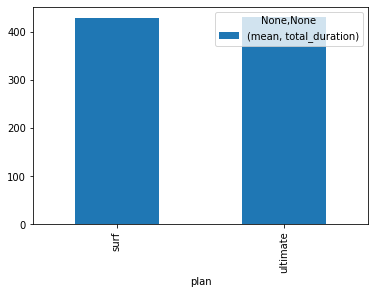

In [190]:
average_calls_per_month.plot(kind='bar')

array([<AxesSubplot:title={'center':'total_duration'}>], dtype=object)

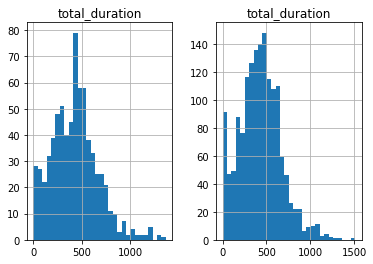

In [191]:
# Bandingkan jumlah menit yang dibutuhkan pengguna tiap paket per bulannya. Buatlah sebuah histogram.
ultimate_duration_per_month = df_profit_plan[df_profit_plan['plan']=='ultimate']

surf_duration_per_month = df_profit_plan[df_profit_plan['plan']=='surf']
fig, axes = plt.subplots(1, 2)
ultimate_duration_per_month.hist('total_duration', bins = 30, ax = axes[0])
surf_duration_per_month.hist('total_duration', bins = 30 , ax = axes[1])


[Hitung rata-rata dan variabel durasi panggilan untuk mempertimbangkan apakah pengguna pada paket yang berbeda memiliki perilaku penggunaan panggilan yang berbeda pula.]

In [192]:
# Hitung rata-rata dan varians dari durasi panggilan bulanan
mean_var_calls_per_month = df_profit_plan.pivot_table(index=['plan'], values='total_duration', aggfunc=['mean','var'])
mean_var_calls_per_month

,mean,var
,total_duration,total_duration
plan,,
surf,428.749523,54968.279461
ultimate,430.450000,57844.464812


In [193]:
# Buatlah grafik boxplot untuk memvisualisasikan distribusi durasi panggilan bulanan

In [194]:
var_surf_calls_per_month = df_profit_plan.loc[df_profit_plan['plan']=='surf'].pivot_table(index=['plan','month'], values='total_duration', aggfunc=['var'])
var_surf_calls_per_month

var
               total_duration
plan month                   
surf April       50866.743265
     August      54344.645963
     December    63629.518918
     February    52226.500000
     January     15842.000000
     July        61005.099725
     June        45592.628436
     March       35809.363636
     May         59754.219754
     November    51607.021602
     October     52278.664056
     September   46595.958656

<AxesSubplot:>

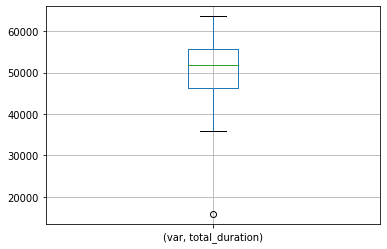

In [195]:
var_surf_calls_per_month.boxplot()

In [196]:
var_ultimate_calls_per_month = df_profit_plan.loc[df_profit_plan['plan']=='ultimate'].pivot_table(index=['plan','month'], values='total_duration', aggfunc=['var'])
var_ultimate_calls_per_month

var
                   total_duration
plan     month                   
ultimate April       34888.928571
         August      53645.506640
         December    62503.783400
         February    76889.476190
         January     16572.333333
         July        72563.374635
         June        42503.563367
         March       61984.931818
         May         43841.046798
         November    60593.222847
         October     54261.910512
         September   57070.464569

<AxesSubplot:>

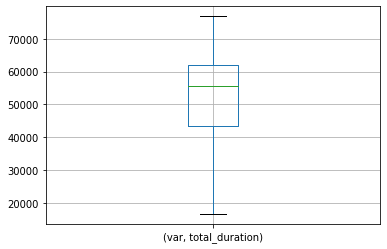

In [197]:
var_ultimate_calls_per_month.boxplot()

<AxesSubplot:>

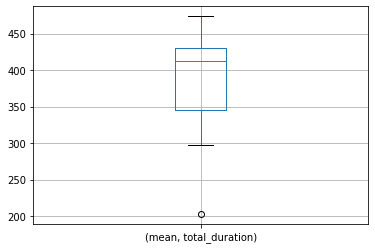

In [198]:
mean_surf_calls_per_month = df_profit_plan.loc[df_profit_plan['plan']=='surf'].pivot_table(index=['plan','month'], values='total_duration', aggfunc=['mean'])
mean_surf_calls_per_month.boxplot()

<AxesSubplot:>

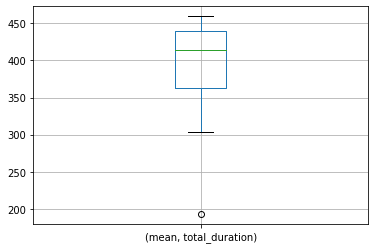

In [199]:
mean_ultimate_calls_per_month = df_profit_plan.loc[df_profit_plan['plan']=='ultimate'].pivot_table(index=['plan','month'], values='total_duration', aggfunc=['mean'])
mean_ultimate_calls_per_month.boxplot()

[Rumuskan kesimpulan tentang perilaku pengguna dalam melakukan panggilan. Apakah perilaku mereka berbeda antara setiap paketnya?]

Baik untuk paket surf ataupun ultimate tidak memiliki perbedaan yang signifikan dari perilaku pengguna <br> dalam rata-rata durasi panggilan bulanan, serta varians panggilan bulanan

### Pesan/SMS

In [200]:
# Bandingkan jumlah SMS yang cenderung dikirim pengguna tiap paket per bulannya
sms_plan_per_month = df.pivot_table(index=['plan'], values='total_sms', aggfunc=['mean','var','std'])
sms_plan_per_month

,mean,var,std
,total_sms,total_sms,total_sms
plan,,,
surf,31.159568,1126.724522,33.566717
ultimate,37.551389,1208.756744,34.767179


[Rumuskan kesimpulan tentang perilaku pengguna terkait pengiriman pesan. Apakah perilaku mereka berbeda antara setiap paketnya?]

Tidak ada perbedaan perilaku yang signifikan pada pengiriman pesan untuk pengguna surf ataupun ultimate, karena rata-rata
jumlah pengiriman pesan kedua paket tidak berbeda jauh.

### Internet

In [201]:
# Bandingkan jumlah traffic internet yang dihabiskan oleh pengguna per paket
session_plan_per_month = df.pivot_table(index=['plan'], values='gb_used', aggfunc=['mean','var','std'])
session_plan_per_month

,mean,var,std
,gb_used,gb_used,gb_used
plan,,,
surf,16.670693,61.58360,7.847522
ultimate,17.306944,58.83055,7.670108


[Rumuskan kesimpulan tentang bagaimana pengguna cenderung mengonsumsi paket data internet? Apakah perilaku mereka berbeda antara setiap paketnya?]

Tidak ada perbedaan yang signifikan antara pengguna kedua paket surf ataupun ultimate karena rata-rata penggunaan <br> paket data memiliki jarak yang dekat, yaitu 16.67 gb untuk rata rata paket surf dan 17.306 gb untuk pengguna paket ultimate

**Memfilter dataframe berdasarkan Plan**

In [202]:
surf_user = df_clean[df_clean['plan']=='surf']
ultimate_user = df_clean[df_clean['plan']=='ultimate']

**Membuat Histogram plot menggunakan seaborn untuk total_duration**

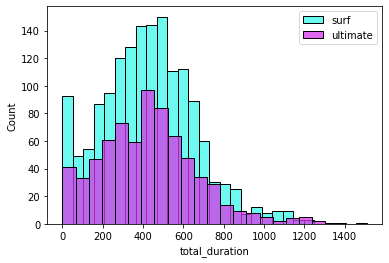

In [203]:
sns.histplot(surf_user['total_duration'], color = '#3CF6EB', label='surf')
sns.histplot(ultimate_user['total_duration'], color ='#D636E9', label='ultimate')
plt.legend()
plt.show()

**Membuat Histogram plot menggunakan seaborn untuk total_sms**

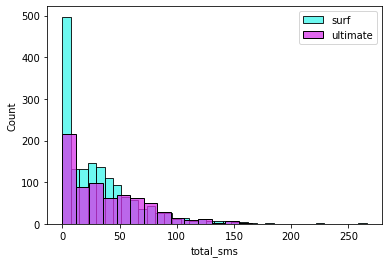

In [204]:
sns.histplot(surf_user['total_sms'], color = '#3CF6EB', label = 'surf')
sns.histplot(ultimate_user['total_sms'], color = '#D636E9', label= 'ultimate')
plt.legend()
plt.show()

**Membuat Histogram plot menggunakan seaborn untuk gb_used**

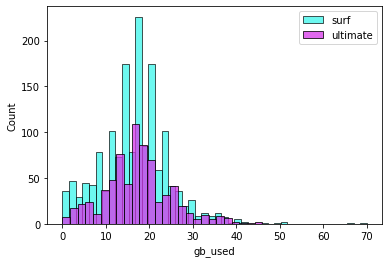

In [205]:
sns.histplot(surf_user['gb_used'], color ='#3CF6EB', label='surf')
sns.histplot(ultimate_user['gb_used'], color='#D636E9', label='ultimate')
plt.legend()
plt.show()

**Kesimpulan Sementara**

Pada Histogram banyak nilai yang mendekati 0, baik untuk `total_duration` , `gb_used` ataupun `total_sms` sehingga <br> dapat disimpulkan bahwa ada sebagian pengguna  yang tidak menggunakan paket data, mengirim sms <br> ataupun melakukan panggilan telfon

**Menangani Outlier**

Kita akan mengecek perubahan dari tampilan histogram dan boxplot setelah kita mengecek dan menghapus outliernya

In [206]:
def upper_lower_whisker(column):
    Q1 = df_clean[column].quantile(0.25)
    Q3 = df_clean[column].quantile(0.75)
    IQR = Q3-Q1
    lower_whisker = Q1 - 1.5*IQR
    upper_whisker = Q3 + 1.5*IQR
    return lower_whisker, upper_whisker

In [207]:
outlier_column = ['total_sms', 'total_duration', 'gb_used']

In [208]:
for column in outlier_column:
    lower, upper = upper_lower_whisker(column)
    print('Batas bawah outlier dari', column, lower)
    print('Batas atas outlier dari', column, upper)
    print('')

Batas bawah outlier dari total_sms -69.0
Batas atas outlier dari total_sms 123.0

Batas bawah outlier dari total_duration -195.5
Batas atas outlier dari total_duration 1032.5

Batas bawah outlier dari gb_used -1.5
Batas atas outlier dari gb_used 34.5



In [209]:
df_fixed = df_clean.copy()
for column in outlier_column:
    lower, upper = upper_lower_whisker(column)
    df_fixed = df_fixed[(df_fixed[column] > lower) & (df_fixed[column] < upper)]

**Menghitung persentase data yang salah**

In [210]:
df_check = df_fixed[['total_duration','total_sms','gb_used']]
for col in df_check.columns:
    wrong_data = df_check[df_check[col]==0]
    percentage_wrong_data = wrong_data[col].count() / df_check[col].count()
    print("Persentase data yang bernilai 0 pada kolom '{}' yaitu:{:.0%} dari keseluruhan data.".format(col, percentage_wrong_data))

Persentase data yang bernilai 0 pada kolom 'total_duration' yaitu:2% dari keseluruhan data.
Persentase data yang bernilai 0 pada kolom 'total_sms' yaitu:22% dari keseluruhan data.
Persentase data yang bernilai 0 pada kolom 'gb_used' yaitu:0% dari keseluruhan data.


Slicing data yang memiliki total durasi = 0

In [211]:
miss_call = 0

In [212]:
df_fixed = df_fixed.query('total_duration > @miss_call')

In [213]:
df_clean.shape[0]

2293

In [214]:
df_fixed.shape[0]

2112

**Kesimpulan Sementara**
- Setelah  outlier dihilangkan terjadi perubahan ukuran data dari 2293 menjadi 2112

**Membuat Grafik tanpa Outlier**

In [215]:
surf_user_clean = df_fixed[df_fixed['plan']=='surf']
ultimate_user_clean = df_fixed[df_fixed['plan']=='ultimate']

**Grafik tanpa Outlier** `total_duration`

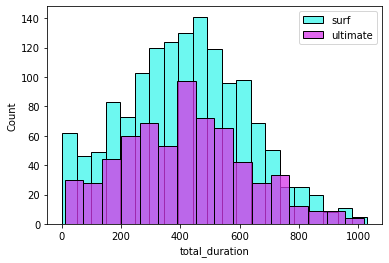

In [216]:
sns.histplot(surf_user_clean['total_duration'], color ='#3CF6EB', label='surf')
sns.histplot(ultimate_user_clean['total_duration'], color='#D636E9', label='ultimate')
plt.legend()
plt.show()

**Grafik tanpa Outlier** `gb_used`

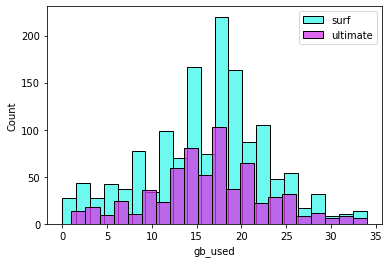

In [217]:
sns.histplot(surf_user_clean['gb_used'], color='#3CF6EB', label='surf')
sns.histplot(ultimate_user_clean['gb_used'], color='#D636E9', label='ultimate')
plt.legend()
plt.show()

**Grafik tanpa Outlier** `total_sms`

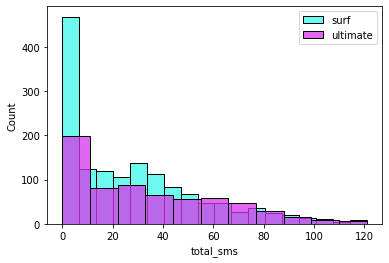

In [218]:
sns.histplot(surf_user_clean['total_sms'], color='#3CF6EB', label='surf')
sns.histplot(ultimate_user_clean['total_sms'], color='#D636E9', label='ultimate')
plt.legend()
plt.show()

In [219]:
df_clean.describe()

,user_id,total_duration,total_sms,gb_used,monthly_profit
count,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000
mean,1246.075883,429.283471,33.166594,16.870475,64.351147
std,143.051927,236.320077,34.070085,7.796174,46.624945
min,1000.000000,0.000000,0.000000,0.000000,20.000000
25%,1122.000000,265.000000,3.000000,12.000000,23.480000
50%,1245.000000,425.000000,26.000000,17.000000,70.000000
75%,1368.000000,572.000000,51.000000,21.000000,70.000000
max,1499.000000,1510.000000,266.000000,70.000000,590.370000


In [220]:
df_fixed.describe()

,user_id,total_duration,total_sms,gb_used,monthly_profit
count,2112.000000,2112.000000,2112.000000,2112.000000,2112.000000
mean,1245.855114,418.458333,29.076231,16.209754,59.583438
std,143.216921,207.947920,28.106405,6.677099,35.656507
min,1000.000000,2.000000,0.000000,0.000000,20.000000
25%,1120.000000,269.750000,3.000000,12.000000,22.310000
50%,1244.500000,419.500000,24.000000,17.000000,70.000000
75%,1368.000000,560.000000,47.000000,20.000000,70.000000
max,1499.000000,1029.000000,121.000000,34.000000,215.570000


Data sudah terlihat lebih bagus tanpa outlier

## Pendapatan

[Seperti halnya Anda telah mempelajari perilaku pengguna, deskripsikan secara statistik pendapatan yang diperoleh antara tiap-tiap paket prabayar].

In [221]:
surf_income = df_fixed[df_fixed['plan']=='surf']
ultimate_income = df_fixed[df_fixed['plan']=='ultimate']

In [222]:
surf_income.pivot_table(index=['plan'], values='monthly_profit', aggfunc=['mean'])


,mean
,monthly_profit
plan,
surf,54.7565


In [223]:
ultimate_income.pivot_table(index=['plan'], values='monthly_profit', aggfunc=['mean'])

,mean
,monthly_profit
plan,
ultimate,70.320611


[Rumuskan kesimpulan tentang bagaimana perbedaan pendapatan yang dihasilkan setiap paket.]

**Kesimpulan Sementara**
<br>Berdasarkan pivot tabel diatas dapat dilihat bahwa rata-rata keuntungan penjualan paket ultimate lebih<br>tinggi jika dibandingkan dengan paket surf

## Menguji Hipotesis Statistik

[Ujilah hipotesis yang menyatakan bahwa pendapatan rata-rata dari pengguna paket prabayar Ultimate dan Surf berbeda.]

[Rumuskan hipotesis nol dan alternatif, pilih pengujian statistiknya, dan tentukan nilai "alpha".]

**Membuat Aggregasi untuk Profit**

In [224]:
mean_profit = df_fixed.groupby(['plan'])[['monthly_profit']].agg(['mean','var'])
mean_profit

monthly_profit             
                   mean          var
plan                                
surf          54.756500  1765.578469
ultimate      70.320611     5.741088

**Mendefinisikan Hipotesis** <br>
H0 : Rata-rata pendapatan paket surf dan ultimate sama<br>
H1 : Rata-rata pendapatan paket surf dan ultimate berbeda

**Lavene Test**

In [226]:
sample_1 = surf_user_clean['monthly_profit']
sample_2 = ultimate_user_clean['monthly_profit']
st.levene(sample_1, sample_2)

LeveneResult(statistic=672.4219968671019, pvalue=6.29828681941007e-129)

Karena p-value < critical value (alpha=0.05) maka H0 ditolak dan kedua sampel dianggap memiliki varians berbeda (equal_var=False)

In [227]:
# Uji hipotesisnya
alpha = 0.05

results = st.ttest_ind(sample_1, sample_2, equal_var=False)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("Kita menolak hipotesis nol")
else:
    print("Kita tidak dapat menolak hipotesis nol")


p-value:  2.1937866399457808e-42
Kita menolak hipotesis nol


[Ujilah hipotesis bahwa pendapatan rata-rata dari pengguna di wilayah NY-NJ berbeda dengan pendapatan pengguna dari wilayah lain.]

[Rumuskan hipotesis nol dan alternatif, pilih pengujian statistiknya, dan tentukan nilai "alpha".]

**Lavene Test**

In [228]:
sample_3 = df_fixed.loc[df_fixed['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA', 'monthly_profit']
sample_4 = df_fixed.loc[df_fixed['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA', 'monthly_profit']

In [229]:
st.levene(sample_3, sample_4)

LeveneResult(statistic=6.380417691210473, pvalue=0.011611262325841507)

Karena p-value < critical value (alpha=0.05) maka H0 ditolak dan kedua sampel dianggap memiliki varians berbeda (equal_var=False)

In [230]:
# Uji hipotesisnya
alpha = 0.05

results = st.ttest_ind(sample_3, sample_4, equal_var=False)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("Kita menolak hipotesis nol")
else:
    print("Kita tidak dapat menolak hipotesis nol")

p-value:  0.02774358347630155
Kita menolak hipotesis nol


**Kesimpulan Uji Hipotesis**

Kesimpulan uji bahwa pendapatan rata-rata dari pengguna paket surf dan ultimate berbeda adalah BENAR <br>
kesimpulan uji bahwa pendapatan rata-rata pengguna di wilayah NY-NJ berbeda dengan pendapatan pengguna dari wilayah lain adalah BENAR

## Kesimpulan Umum

[Tuliskan kesimpulan Anda di bagian akhir, pastikan kesimpulan tersebut mencakup semua keputusan (asumsi) penting yang telah Anda buat, serta yang menuntun Anda pada cara Anda memproses dan menganalisis data.]

**Pra - Pemrosesan Data**

- Terdapat 5 buah dataframe yaitu: <br> `df_calls` <br> `df_internet` <br> `df_messages` <br> `df_plans` <br> `df_users`

- Tidak ada data yang terduplikat
- Terdapat nilai yang hilang pada kolom `churn_date`
- Terdapat beberapa tipe data yang tidak sesuai yang harus diubah ke format datetime
- Untuk beberapa data dilakukan perbaikan, kemudian digabungkan
- Dilakukan perhitungan profit

**EDA (Analisis Data Eksploratif)**

Dari hasil analisis data esksploratif, dapat disimpulkan bahwa:

Parameter pada kolom 'user_id', 'city', 'month', 'total_duration', 'total_sms', 'gb_used', 'plan', dan 'monthly_profit' dipelajari untuk mengetahui keakuratan data.
Tedapat outlier, dataframe dibuat baru tanpa outlier dengan jumlah baris yang semula 2293 menjadi 2112.

**Analisis Hasil Hipotesis Testing**

Hipotesis pendapatan rata-rata paket surf dan ultimate berbeda dinyatakan benar <br> Hipotesis pendapatan rata rata di wilayah NY-NJ berbeda dengan wilayah lain dinyatakan benar